In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

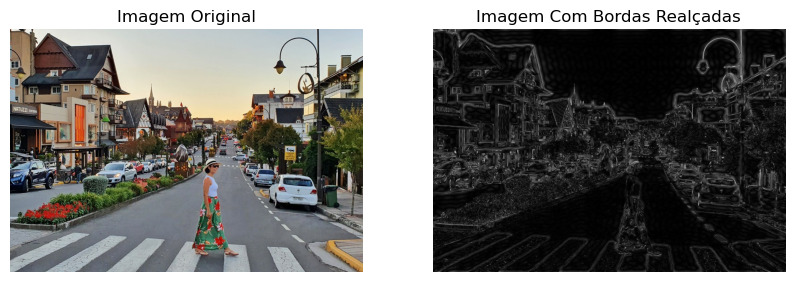

In [11]:
def process_channel(channel):
    """ Aplica a DFT e o filtro de realce de bordas em um único canal de cor. """
    dft = np.fft.fft2(channel)
    dft_shift = np.fft.fftshift(dft)
    
    rows, cols = channel.shape
    crow, ccol = rows // 2, cols // 2

    # Criar uma máscara de passa-alta
    mask = np.zeros_like(channel)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 1
    mask = 1 - mask

    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    # Normalizar e converter para uint8
    img_back = (img_back / np.max(img_back) * 255).astype(np.uint8)

    return img_back

def edge_enhancement_dft(image):
    """ Realça as bordas de uma imagem usando a DFT. """
    if len(image.shape) == 3:  # Imagem colorida
        # Converter para escala de cinza antes de processar
        gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        enhanced_image = process_channel(gray_image)
    else:  # Imagem em escala de cinza
        enhanced_image = process_channel(image)

    return enhanced_image

# Carregar a imagem original
image_path = 'gramado.jpg'  # Substitua pelo caminho da sua imagem
original_image = cv.imread(image_path)

# Realce de bordas
edge_enhanced_image = edge_enhancement_dft(original_image)

# Exibir as imagens lado a lado
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
axs[0].set_title('Imagem Original')
axs[0].axis('off')

axs[1].imshow(edge_enhanced_image, cmap='gray')
axs[1].set_title('Imagem Com Bordas Realçadas')
axs[1].axis('off')
plt.savefig('bordas_gramado.png', dpi=300, bbox_inches='tight')

plt.show()

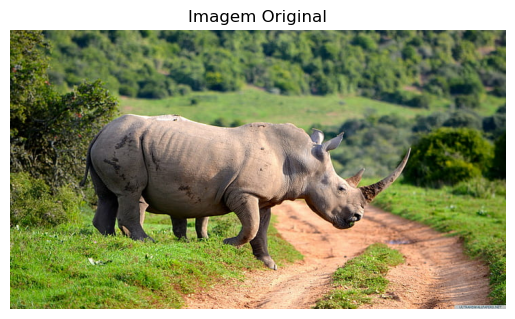

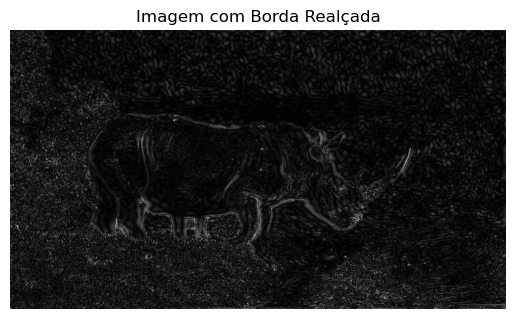

In [3]:
def process_channel_and_save_intermediates(channel, save_path_prefix):
    # Aplica a DFT
    dft = np.fft.fft2(channel)
    dft_shift = np.fft.fftshift(dft)

    # Salva a magnitude do espectro de frequência da DFT
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift))
    plt.imsave(f'{save_path_prefix}_dft_magnitude.png', magnitude_spectrum, cmap='gray')

    # Cria a máscara de passa-alta
    rows, cols = channel.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros_like(channel)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 1
    mask = 1 - mask
    plt.imsave(f'{save_path_prefix}_mask.png', mask, cmap='gray')

    # Aplica a máscara e realiza a TDF Inversa
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    # Normaliza e salva a imagem final
    img_back = (img_back / np.max(img_back) * 255).astype(np.uint8)
    plt.imsave(f'{save_path_prefix}_edge_enhanced.png', img_back, cmap='gray')

    return img_back

def edge_enhancement_dft_and_save_intermediates(image, save_path_prefix):
    if len(image.shape) == 3:  # Imagem colorida
        gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        enhanced_image = process_channel_and_save_intermediates(gray_image, save_path_prefix)
    else:  # Imagem em escala de cinza
        enhanced_image = process_channel_and_save_intermediates(image, save_path_prefix)

    return enhanced_image

# Carregar a imagem original
image_path = 'chifre.jpg'  # Substitua pelo caminho da sua imagem
original_image = cv.imread(image_path)

# Realce de bordas e salva intermediários
save_path_prefix = 'intermediate_output'
edge_enhanced_image = edge_enhancement_dft_and_save_intermediates(original_image, save_path_prefix)

# Exibir as imagens
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
plt.title('Imagem Original')
plt.axis('off')
plt.show()

plt.imshow(edge_enhanced_image, cmap='gray')
plt.title('Imagem com Borda Realçada')
plt.axis('off')
plt.show()
